# REPORT

## Learning Algorithm

To solve this environment a version of a Deep Deterministic Policy Gradient Algorithm was used. As the agent explores the environment, a history of the interactions is stored, which is then randomly sampled to train the agent. Since the environment had 20 simultaneous agents, the random noise generated for each agent's action was generated separately (20 random noises to ensure exploration)

Hyperparameters used:
 * BUFFER_SIZE = int(1e5)  # replay buffer size
 * BATCH_SIZE = 1024        # minibatch size
 * GAMMA = 0.99            # discount factor
 * TAU = 1e-3              # for soft update of target parameters
 * LR_ACTOR = 1e-4         # learning rate of the actor
 * LR_CRITIC = 1e-3        # learning rate of the critic
 * UPDATE_EVERY = 2


Following things were tested in order to find the best possible hyperparameters:
 * Only learn each Nth timestep
 * Change batch size: larger batch sizes proved to be more effective)
 * Smaller buffer size: reducing the buffer size worked because the agent learned from a fresher set of experiences)
 * Change size of networks: smallest possible networks that still were able to capture enough data were used
 * Add batch normalization: proved to be effective at stabilizing learning
 * Change learning rates of both actor and critic


In order to store/update the actor's policy model four deep neural networks were used - 2 for the actor network and 2 for the critic. The actor networks had 2 hidden layers (128, 64) and the critic networks had 3 hidden layers (128, 64, 32). Batch normalization was added to both networks as it proved to make for more stable learning. (See model.py for the implementation)

## Plot of Rewards

Below is the plot of scores achieved by the agent during training. In this particular run the environment was solved in 18 episodes:

Episode 50 Average Score: 16.11 Score: 34.15\
Episode 100 Average Score: 24.06 Score: 33.36\
Episode 118 Average Score: 30.07 Score: 35.69\
Environment solved in 18 episodes! Average Score: 30.07

Run the cell below to see a plot of the scores achieved by the agent.

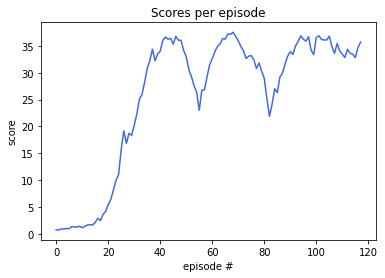

In [14]:
import matplotlib.pyplot as plt

def plot_scores(scores):
    plt.plot(scores, color='royalblue')
    plt.title('Scores per episode')
    plt.ylabel('score')
    plt.xlabel('episode #')
    plt.show()

scores = [0.76, 0.74, 0.92, 0.92, 1.01, 0.98, 1.36, 1.31, 1.25, 1.43, 1.15, 1.38, 1.66, 1.7, 1.66, 2.11, 2.92, 2.45, 3.6, 4.18, 5.42, 6.4, 8.16, 9.98, 11.05, 15.67, 19.19, 16.85, 18.73, 18.33, 20.2, 22.32, 25.07, 25.95, 28.21, 30.78, 32.22, 34.39, 32.22, 33.47, 34.01, 36.05, 36.64, 36.25, 36.37, 35.31, 36.78, 36.03, 36.04, 34.15, 32.94, 30.59, 29.25, 27.59, 26.37, 23.0, 26.78, 26.8, 29.25, 31.49, 32.62, 33.92, 34.88, 35.35, 36.36, 36.25, 37.21, 37.13, 37.53, 36.77, 35.94, 34.9, 34.08, 32.64, 33.07, 33.17, 32.42, 30.78, 31.82, 30.27, 28.94, 25.18, 21.87, 24.11, 27.03, 26.29, 29.17, 29.95, 31.63, 33.08, 33.91, 33.4, 34.98, 35.81, 36.87, 36.25, 35.88, 36.68, 34.18, 33.36, 36.59, 36.87, 36.19, 36.09, 36.09, 36.8, 34.86, 33.61, 35.44, 34.06, 33.45, 32.82, 34.37, 33.59, 33.44, 32.81, 34.65, 35.69]

plot_scores(scores)

## Ideas for Future Work

Further exploration of changing hyperparameters could potentially yield better results. Additionally changing the size and shape of the neural networks could result in faster training, both per episode and total number of episodes to solve. Since the score does seem to drop sometimes with the current hyperparameters, it does go back up and solves the enviroment fairly quickly.

In this solution, one agent with one set of neural networks was used, even though there were 20 agents acting in the environment simultaneously. Each agent's state would be passed through the network one at a time. Another option would be to pass in all 20 states at once. And yet another possible solution would be to generate 20 separate agents, each with their own actor and critic networks. However this solution seemed like it would take a considerably longer running time.

I have noticed some odd behavior where the agent would not learn at all and the score would hover around 0 for many episodes. This seemed to occur randomly and only happen in a certain percentage of the runs. However, since adding batch normalization and tweaking the parameters, the behavior seemed to stop. Further investigation of this problem may be needed if it does still occur some percentage of the runs.